# Visualization and preprocessing of survey data
* XML to Pandas DataFrames
* From datatime vs all parties to tidy data
* Rolling mean
* Data from
https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2018/pollofpolls.xml
* Plotnine [docs](https://media.readthedocs.org/pdf/plotnine/latest/plotnine.pdf)

In [3]:
import pandas as pd
from urllib.request import urlopen
import xml.etree.cElementTree as et

In [9]:
url = 'https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2018/pollofpolls.xml'
xml_data = urlopen(url).read()

ModuleNotFoundError: No module named 'xmltodict'

In [18]:
root = et.fromstring(xml_data)
parties = ['None', 'A', 'B', 'C', 'D', 'F', 'I', 'K', 'O', 'V', 'Ø', 'Å'] 

In [19]:
df = pd.DataFrame(columns=['datetime'].append(parties))
for child in root.iter('poll'):
    d = dict()
    d['datetime'] = pd.to_datetime(child.find('datetime').text)
    entries = child.find('entries')
    for entry in entries:
        letter = entry.find('party').find('letter').text
        d[letter] = float(entry.find('percent').text)
    df = df.append(d, ignore_index=True)

In [20]:
df.shape

(69, 13)

In [41]:
df

,Unknown,A,B,C,D,F,I,K,O,V,datetime,Å,Ø
0,5.3,26.5,6.2,3.7,2.9,5.2,5.0,0.7,17.9,13.3,2018-09-30,4.8,8.6
1,NaN,26.3,6.0,3.8,3.1,5.3,5.1,0.6,17.6,18.7,2018-09-23,4.8,8.7
2,NaN,26.3,5.8,3.8,3.2,5.2,5.0,0.6,17.7,18.7,2018-09-18,4.9,9.0
3,NaN,26.2,5.8,3.9,3.2,5.3,4.9,0.7,17.6,18.5,2018-09-16,4.9,9.1
4,NaN,26.1,5.8,4.1,3.2,5.1,4.9,0.8,17.6,18.3,2018-09-14,4.8,9.3
5,NaN,25.6,6.0,4.0,2.7,5.3,5.2,0.8,17.8,18.6,2018-09-08,4.8,9.2
6,NaN,25.7,6.2,4.2,2.6,5.3,4.9,0.8,17.8,18.7,2018-08-30,4.5,9.3
7,NaN,26.1,5.9,4.2,2.8,5.1,4.9,0.8,17.7,18.7,2018-08-28,4.6,9.2
8,NaN,25.9,6.0,4.3,3.0,5.3,4.9,0.7,17.5,18.6,2018-08-26,4.5,9.3
9,NaN,26.0,5.7,4.1,2.6,5.3,4.7,0.7,18.4,19.0,2018-08-22,4.5,8.9


In [44]:
df.rename(columns={df.columns.values[0]: 'Unknown'}, inplace=True)
df.to_csv('../data/b_survey_folketinget_2018.csv')

In [45]:
import plotnine as pn

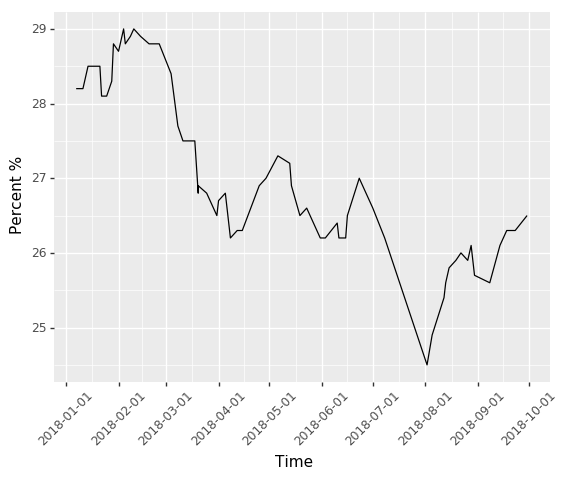

<ggplot: (-9223363287993639217)>

In [46]:
(pn.ggplot(df) 
 + pn.aes(x='datetime', y='A') 
 + pn.geom_line() 
 + pn.theme(axis_text_x=pn.element_text(angle=45)) 
 + pn.labs(x='Time', y='Percent %')
)

In [51]:
# Un-pivoting / tidy data
dftd = df.melt(id_vars=['datetime'], value_vars=parties, var_name='parties', value_name='percent')

In [52]:
dftd

,datetime,parties,percent
0,2018-09-30,None,NaN
1,2018-09-23,None,NaN
2,2018-09-18,None,NaN
3,2018-09-16,None,NaN
4,2018-09-14,None,NaN
5,2018-09-08,None,NaN
6,2018-08-30,None,NaN
7,2018-08-28,None,NaN
8,2018-08-26,None,NaN
9,2018-08-22,None,NaN


/home/tlj/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 69 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


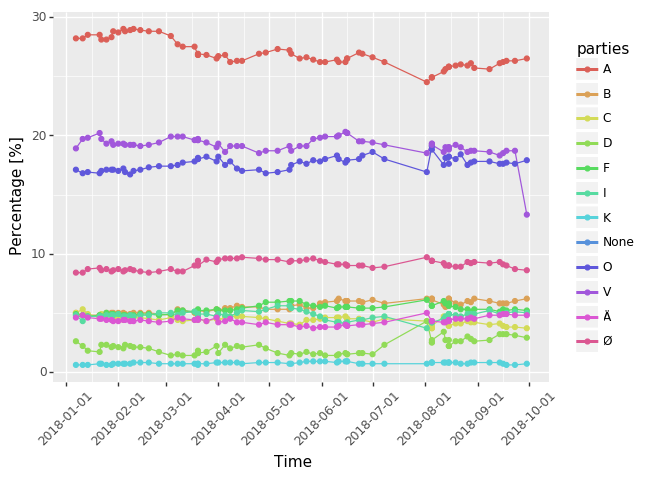

<ggplot: (-9223363287993657547)>

In [53]:
(pn.ggplot(dftd) 
 + pn.aes(x='datetime', y='percent', color='parties') 
 #+ pn.geom_text(data=dftd[0:-1:20],nudge_y=1.25)
 + pn.geom_line() 
 + pn.geom_point() 
 + pn.theme(axis_text_x=pn.element_text(angle=45)) 
 + pn.labs(x='Time', y='Percentage [%]')
)

In [54]:
# Redunant coding

/home/tlj/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_text : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/tlj/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 69 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


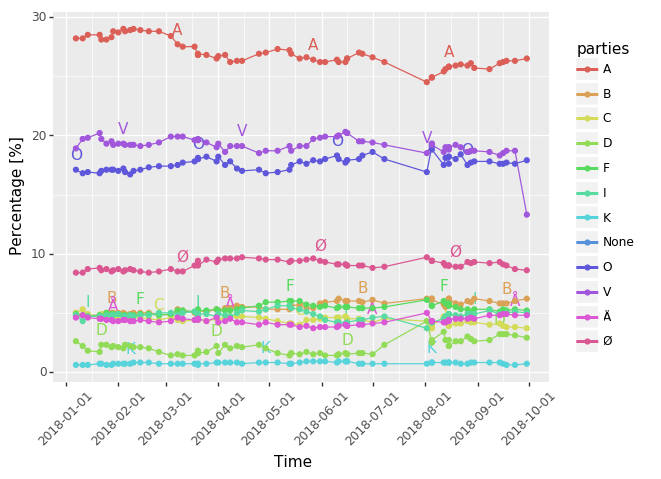

<ggplot: (-9223363287993691900)>

In [55]:
(pn.ggplot(dftd) 
 + pn.aes(x='datetime', y='percent', color='parties', label='parties')
 + pn.geom_text(data = dftd[::20], nudge_y=1.25, show_legend=False)
 + pn.geom_line() 
 + pn.geom_point()
 + pn.theme(axis_text_x=pn.element_text(angle=45)) 
 + pn.labs(x='Time', y='Percentage [%]')
)

## Tidy data directly from XML

In [16]:
def decode_none(text):
    if text is None:
        return 'None'
    else:
        return text
    
data = []
parent_map = dict((c, p) for p in root.iter() for c in p)
for child in root.iter('percent'):
    parent = parent_map[child]
    grandgrand_parent = parent_map[parent_map[parent]]
    data.append([pd.to_datetime(grandgrand_parent.find('datetime').text), 
                 decode_none(parent.find('party').find('letter').text),
                 float(child.text)])

In [17]:
dftd2 = pd.DataFrame(data, columns=['datetime', 'parties', 'percent'])

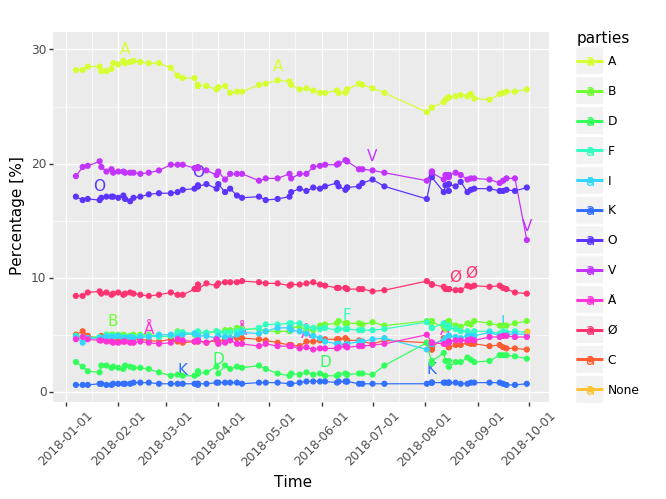

<ggplot: (-9223363252672684053)>

In [18]:
(pn.ggplot(data=dftd2) 
 + pn.aes(x='datetime', y='percent', color='parties', label='parties') 
 + pn.geom_text(data=dftd2[0:-1:40],nudge_y=1.25)
 + pn.geom_line() 
 + pn.geom_point() 
 + pn.theme(axis_text_x=pn.element_text(angle=45)) 
 + pn.labs(x='Time', y='Percentage [%]')
 + pn.scale_color_hue(h=.2,l=.6,s=1)
)

In [ ]:
dftd2.groupby('parties').mean()

## Rolling mean

In [ ]:
dftd2_dt = dftd2.set_index('datetime')
grm = dftd2_dt.groupby('parties')['percent'].rolling(3, center=True).mean()
df_grm = pd.DataFrame(grm)
df_grm.reset_index(inplace=True)

In [ ]:
(pn.ggplot(data=df_grm)
 + pn.aes(x='datetime', y='percent', color='parties', label='parties')
 + pn.geom_line()
 + pn.geom_point()
 + pn.geom_text(data=df_grm[0:-1:40],nudge_y=1.25)
 + pn.theme(axis_text_x=pn.element_text(angle=45))
 + pn.labs(x='Time', y='Percentage [%]')
 + pn.scale_color_hue(h=.2,l=.6,s=1)
)